### Thinking1
MVC框架指的是什么

答：MVC框架是设计创建Web应用程序的一种模式，MVC是模型（model)-视图（view)-控制器（controller)的缩写，其中model部分指应用程序中用于处理数据逻辑的部分，通常负责在数据库中存取数据，view部分指应用程序中用于处理数据显示的部分，依据模型数据创建，controller部分则是用于处理用户交互的部分，通常负责从view中读取数据，以及控制用户输入并向模型发送数据。MVC框架将数据处理，界面显示，业务逻辑分离，有助于复杂的应用程序的管理，简化了应用程序的分组开发。

### Thinking2
基于Python的可视化技术都有哪些，你使用过哪些

答：基于Python的可视化技术有matplotlib，seaborn，plotly，bokeh，geoplotlib、folium（地理数据可视化），graphviz（决策树可视化），wordcloud（词云展示）等，使用过matplotlib，seaborn，folium，GraphViz，wordcloud。

### Action1
购物篮词云分析
数据集：MarketBasket
下载地址：https://www.kaggle.com/dragonheir/basket-optimisation
对数据集进行词云可视化展示，可视化探索（Top10的商品有哪些）

In [2]:
import os
os.getcwd()

'C:\\Users\\80566\\BI\\week2'

In [2]:
# 数据加载
import pandas as pd
data = pd.read_csv('./datasets_8127_11403_Market_Basket_Optimisation.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 统计词频
from collections import defaultdict
temp = defaultdict(int)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if str(data.values[i,j]) != 'nan':
            temp[data.values[i,j].lower()] += 1
            
# 查看Top10的商品
top10 = sorted(temp.items(), key=lambda x: x[1], reverse=True)[:10]
top10

[('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1230),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713)]

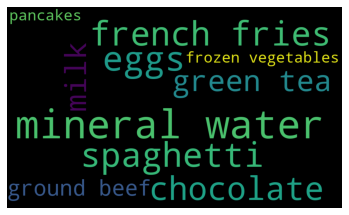

In [6]:
# 根据词频生成词云
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def create_word_cloud(fre_dic):
    wc = WordCloud(max_words=10, width=1000, height=600)
    wordcloud = wc.fit_words(fre_dic)
    # 生成词云图片
    wordcloud.to_file('wordcloud.jpg')
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
create_word_cloud(temp)